In [7]:
import laspy
data_path_full = "/scratch-grete/projects/workshops/gpu-workshop/synthetic_trees_full_resolution/train/tree_4561.las"
las_full = laspy.read(data_path_full)
las_full

<LasData(1.4, point fmt: <PointFormat(6, 24 bytes of extra dims)>, 2874097 points, 1 vlrs)>

In [6]:
data_path_sampled = "/scratch/projects/workshops/gpu-workshop/synthetic_trees_ten_sampled/train/tree_4561.las"
las_sampled = laspy.read(data_path_sampled)
las_sampled

<LasData(1.4, point fmt: <PointFormat(6, 24 bytes of extra dims)>, 1024 points, 1 vlrs)>

In [11]:
## lists column names in las file.
point_format = las_full.point_format
list(point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'synthetic',
 'key_point',
 'withheld',
 'overlap',
 'scanner_channel',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'user_data',
 'scan_angle',
 'point_source_id',
 'gps_time',
 'echo_width',
 'fullwaveIndex',
 'hitObjectId',
 'heliosAmplitude']

In [21]:
import numpy as np
import laspy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

input_las = laspy.read(data_path_full)
point_records = input_las.points.copy()

# getting scaling and offset parameters
las_scaleX = input_las.header.scale[0]
las_offsetX = input_las.header.offset[0]
las_scaleY = input_las.header.scale[1]
las_offsetY = input_las.header.offset[1]
las_scaleZ = input_las.header.scale[2]
las_offsetZ = input_las.header.offset[2]



In [33]:
point_records['X']

array([132727, 133039, 132825, ..., 198919, 198372, 198472], dtype=int32)

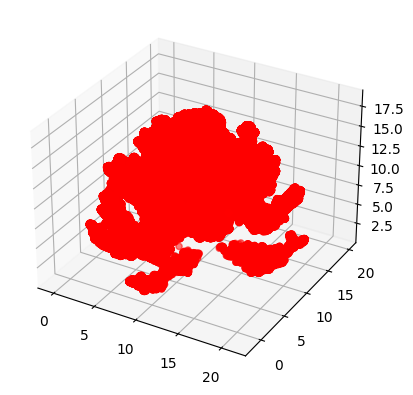

In [34]:
# calculating coordinates
p_X = np.array((point_records['X'] * las_scaleX) + las_offsetX)
p_Y = np.array((point_records['Y'] * las_scaleY) + las_offsetY)
p_Z = np.array((point_records['Z'] * las_scaleZ) + las_offsetZ)

# plotting points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p_X, p_Y, p_Z, c='r', marker='o')
plt.show()